### Overview: Climate Change Belief Analysis 2022



Many companies are built around lessening one’s environmental impact or carbon footprint. They offer products and services that are environmentally friendly and sustainable, in line with their values and ideals. They would like to determine how people perceive climate change and whether or not they believe it is a real threat. This would add to their market research efforts in gauging how their product/service may be received.

With this context, EDSA is challenging you during the Classification Sprint with the task of creating a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data.

Providing an accurate and robust solution to this task gives companies access to a broad base of consumer sentiment, spanning multiple demographic and geographic categories - thus increasing their insights and informing future marketing strategies.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Pre-processing of the datasets</a>

<a href=#four>4. Exploratory Data Analysis (EDA)</a>

<a href=#five>5. Data Engineering</a>

<a href=#six>6. Modeling</a>

<a href=#seven>7. Model Performance</a>

<a href=#seven>8. Model Explanations</a>

<a href=#seven>9. Conclusion</a>

<a href=#seven>10. References</a>

 <a id="one"></a>
# 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section we imported and briefly discussed the libraries that will be used throughout the analysis and modelling. |

---

### 1.1. Data analysis Packages
To analyze the the data we will need the following packages
<ul> 
    <li><b>Numpy</b></li>
    Numpy is a packages used to perform a wide variety of mathematical operations on arrays. It adds powerful data structures to Python that guarantee efficient calculations with arrays and matrices and it supplies an enormous library of high-level mathematical functions that operate on these arrays and matrices.<br>
    <li><b>Pandas</b></li>
    Pandas is mainly used for data analysis and associated manipulation of tabular data in Dataframes. Pandas allows importing data from various file formats such as comma-separated values, JSON, Parquet, SQL database tables or queries, and Microsoft Excel.
    <li><b>Matplotlib</b></li>
    Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It is a cross-platform library for making 2D plots from data in arrays. It provides an object-oriented API that helps in embedding plots in applications using Python GUI toolkits such as PyQt, WxPythonotTkinter.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
    <li><b>Wordcloud</b></li>
    A wordcloud is a collection, or cluster, of words depicted in different sizes. The bigger and bolder the word appears, the more often it’s mentioned within a given text and the more important it is.
</ul>

In [2]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd      
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# set plot style
sns.set()

### 1.2. Data Preparation Packages
Before fitting the model to the data it is necessary to do some work on it. THe following packages will help achieve that.

<ul> 
    <li><b>stopwords</b></li>
    Decision trees regression normally use mean squared error (MSE) to decide to split a node in two or more sub-nodes. Suppose we are doing a binary tree the algorithm first will pick a value, and split the data into two subset. For each subset, it will calculate the MSE separately.
    <li><b>tokenizer</b></li>
    A random forest regressor. A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
    <li><b>WordNetLemmatizer</b></li>
    A voting regressor is an ensemble meta-estimator that fits several base regressors, each on the whole dataset. Then it averages the individual predictions to form a final prediction.
    <li><b>CountVectorizer</b></li>
    Stacked generalization consists in stacking the output of individual estimator and use a regressor to compute the final prediction. 
    <li><b>PorterStemmer</b></li>
    A Bagging regressor is an ensemble meta-estimator that fits base regressors each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction.
    <li><b>SVM</b></li>
    Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. The advantages of support vector machines are: Effective in high dimensional spaces. Still effective in cases where number of dimensions is greater than the number of samples.
    <li><b>Seaborn</b></li>
    Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures. Seaborn helps you explore and understand your data.
</ul>

In [3]:
import nltk   #Importing nltk
from nltk.corpus import stopwords  #importing Stopwords
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
import pickle

In [4]:
import warnings
warnings.filterwarnings('ignore')

### 1.3. Data Engineering Packages


In [5]:
from sklearn.utils import resample
from nltk.util import ngrams
from imblearn.over_sampling import SMOTE 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

### 1.4. Machine Learning Packages
To analyze the data we will need the following packages
<ul> 
    <li><b>train_test_split</b></li> train_test_split is a model validation procedure that allows you to simulate how a model would perform on new/unseen data.
    <li><b>LogisticRegression</b></li> Logistic regression is a statistical analysis method to predict a binary outcome, such as yes or no, based on prior observations of a data set.
    <li><b>DecisionTreeClassifier</b></li> DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.
    <li><b>XGBClassifier</b></li> XGBoost, which stands for Extreme Gradient Boosting, is a scalable, distributed gradient-boosted decision tree (GBDT) machine learning library. It provides parallel tree boosting and is the leading machine learning library for regression, classification, and ranking problems.
    <li><b>CatBoostClassifier</b></li> CatBoost is an algorithm for gradient boosting on decision trees. It is developed by Yandex researchers and engineers, and is used for search, recommendation systems, personal assistant, self-driving cars, weather prediction and many other tasks at Yandex and in other companies, including CERN, Cloudflare, Careem taxi. It is in open-source and can be used by anyone. The CatBoost library can be used to solve both classification and regression challenge.
    <li><b>VotingClassifier</b></li> A voting classifier is a machine learning estimator that trains various base models or estimators and predicts on the basis of aggregating the findings of each base estimator.
</ul>

In [6]:
# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.naive_bayes import MultinomialNB

# Model performance metric libraries
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import classification_report

### 1.5. Other Packages
To analyze the the data we will need the following packages
<ul> 
    <li><b>Pickle</b></li>
    Pickle in Python is primarily used in serializing and deserializing a Python object structure. In other words, it's the process of converting a Python object into a byte stream to store it in a file/database, maintain program state across sessions, or transport data over the network.
    <li><b>Metrics</b></li>
    The sklearn. metrics module implements several loss, score, and utility functions to measure classification performance. Some metrics might require probability estimates of the positive class, confidence values, or binary decisions values.
    <li><b>Math</b></li>
    For straightforward mathematical calculations in Python, you can use the built-in mathematical operators, such as addition ( + ), subtraction ( - ), division ( / ), and multiplication ( * ). But more advanced operations, such as exponential, logarithmic, trigonometric, or power functions, are not built in.
</ul>

<a id="two"></a>
# 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section we are going to load the data from the `train` and  `test_with_no_labels` file into DataFrames. |

---

For the pupose of the model development, two datasets have been provided in two csv files
<ul>
<li><b>Train Data Set</b></li>
Training data is an extremely large dataset that is used to teach a machine learning model. Training data is used to teach prediction models that use machine learning algorithms how to extract features that are relevant to specific business goals.
<li><b>Test Data Set</b></li>
Test data is data which has been specifically identified for use in tests, typically of a computer program. Some data may be used in a confirmatory way, typically to verify that a given set of input to a given function produces some expected result.
</ul>

We will load these datasets in two data frames so we can use them for the model development. After loading the data, we will display the head of the dataset to get the first idea of the type of data we are working with.


In [7]:
#Loading the train dataset
df_train = pd.read_csv('C:/Users/emmau/Downloads/sentiment-climate/climate-sentiment-analysis/data/01_raw/traindf.csv')
df_train.head(20)

,sentiment,message,tweetid
0,-1,RT @darreljorstad: Funny as hell! Canada deman...,897853122080407553
1,-1,All the biggest lies about climate change and ...,925046776553529344
2,-1,The Coming Revelation Of The $q$Global Warming...,696354236850786305
3,-1,RT @DineshDSouza: Let's see if the world ends ...,846806509732483072
4,-1,RT @SteveSGoddard: Obama has no control over t...,628085266293653504
5,-1,RT @seanhannity: NEXT Bill Cunningham and @Mon...,806082908574380032
6,-1,RT @T_S_P_O_O_K_Y: @beardoweird0 @20committee ...,820118259273990144
7,-1,RT @DBloom451: EPA chief Pruitt rightly points...,840025826418667522
8,-1,RT @InfoWarsChannel: Exposed: How world leader...,828670720175644673
9,-1,@Alyssa_Milano Funding climate change is a scam.,859567392761888768


From the trained data, it can be observed that we are dealing with text and numeric data. The label is numeric, where;

   2 represents news about climate change

   1 represents pro climate change

   0 represents neutral

 -1 represents anti climate change

In [8]:
#checking the number of rows and column in our train dataset. 
df_train.shape

(30759, 3)

The train data contains 15819 observations while there is 3 columns in which we are dropping the third column which represents ID of twitter users. This is because we do not need the ID column.

In [9]:
#Loading the test dataset
df_test = pd.read_csv('C:/Users/emmau/Downloads/sentiment-climate/climate-sentiment-analysis/data/01_raw/test.csv')
df_test.head(20)

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \r\nPu...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928
5,RT @nycjim: Trump muzzles employees of several...,75639
6,@bmastenbrook yes wrote that in 3rd yr Comp Sc...,211536
7,RT @climatehawk1: Indonesian farmers weather #...,569434
8,RT @guardian: British scientists face a ‘huge ...,315368
9,Aid For Agriculture | Sustainable agriculture ...,591733


From the test data, it can be observed that we are dealing with text and numeric data. Unlike the train data, there is no label column here because that is what we are going to be predicting.

In [10]:
df_test.shape

(10546, 2)

The test data contains 10546 observations while there are 2 columns in which we are dropping the second column which represents ID of twitter users. This is because we do not need the ID column.

<a id="three"></a>
# 3. Pre-processing of the datasets
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Pre-processing of the datasets ⚡ |
| :--------------------------- |
| In this section we are going to perform thorough cleaning of the dataset. Since it is text data, we are going to use the Natural Language Processor (NLP) for this pre-process phase.

---

Before training our model on the given data, we need to make sure the data is clean enough for use. This is because our model is only as good as the data we feed it. Therefore, the first cleaning of the datasets is going to be done on the train dataset then the unseen test data with the use of Natural Language Processor(NLP).

In [11]:
def preprocess_text_column(dataframe, message_column):
    """
    This function helps preprocess the message column in the DataFrame by 
    performing noise removal, punctuation removal,
    converting text to lowercase, tokenizing, 
    stopword removal, lemmatizing, and 
    generating the final output
    in a sentence form.

    Args:
        dataframe (pandas.DataFrame): The input pandas DataFrame containing the message column.
        message_column (str): The name of the text column in the DataFrame to be preprocessed.

    Returns:
        pandas.DataFrame: The modified DataFrame with the preprocessed text column. 
    
    """
    
    # Noise Removal
    dataframe[message_column] = dataframe[message_column].apply(lambda x: ' '.join(x.split()))

    # Punctuation Removal
    dataframe[message_column] = dataframe[message_column].apply(lambda x: x.translate
                                                          (str.maketrans("", "", string.punctuation)))

    # Converting text to lowercase
    dataframe[message_column] = dataframe[message_column].apply(lambda x: x.lower())

    # Tokenizing
    dataframe[message_column] = dataframe[message_column].apply(lambda x: word_tokenize(x))

    # Stopword Removal
    stop_words = set(stopwords.words('english'))
    dataframe[message_column] = dataframe[message_column].apply(lambda x: [token for token in x if 
                                                                     token not in stop_words])

    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    dataframe[message_column] = dataframe[message_column].apply(lambda x: [lemmatizer.lemmatize
                                                                     (token) for token in x])

    # Final output in sentence form
    dataframe[message_column] = dataframe[message_column].apply(lambda x: ' '.join(x))

    return dataframe

In [12]:
#preprocessing train data
preprocessed_train_data = preprocess_text_column(df_train, 'message')
preprocessed_train_data

,sentiment,message,tweetid
0,-1,rt darreljorstad funny hell canada demand gend...,897853122080407553
1,-1,biggest lie climate change global warming debu...,925046776553529344
2,-1,coming revelation qglobal warmingq fraud resem...,696354236850786305
3,-1,rt dineshdsouza let see world end realdonaldtr...,846806509732483072
4,-1,rt stevesgoddard obama control climate worst s...,628085266293653504
...,...,...,...
30754,2,rt time pentagon warned climate change threate...,958155326259367937
30755,2,study find global warming exacerbates refugee ...,956048238615900163
30756,2,rt mikeyslezak global green movement prepares ...,800258621485391872
30757,2,rt profedwardsnz nyc mayor say ny go faster ad...,871365767895404545


In [13]:
#preprocessing test data
preprocessed_test_data = preprocess_text_column(df_test, 'message')
preprocessed_test_data

,message,tweetid
0,europe looking china make sure alone fighting ...,169760
1,combine polling staffer climate change woman r...,35326
2,scary unimpeachable evidence climate change al...,224985
3,karoli morgfair osborneink dailykos putin got ...,476263
4,rt fakewillmoore female orgasm cause global wa...,872928
...,...,...
10541,rt brittanybohrer brb writing poem climate cha...,895714
10542,2016 year climate change came home hottest yea...,875167
10543,rt loopvanuatu pacific country positive fiji l...,78329
10544,rt xanria00018 ’ hot must cause global warming...,867455


In [14]:
#clean train message
clean_train_data = preprocessed_train_data['message']
clean_train_data

0        rt darreljorstad funny hell canada demand gend...
1        biggest lie climate change global warming debu...
2        coming revelation qglobal warmingq fraud resem...
3        rt dineshdsouza let see world end realdonaldtr...
4        rt stevesgoddard obama control climate worst s...
                               ...                        
30754    rt time pentagon warned climate change threate...
30755    study find global warming exacerbates refugee ...
30756    rt mikeyslezak global green movement prepares ...
30757    rt profedwardsnz nyc mayor say ny go faster ad...
30758    rt sander climate change cause terrorism https...
Name: message, Length: 30759, dtype: object

In [15]:
#clean train message
clean_test_data = preprocessed_test_data['message']
clean_test_data

0        europe looking china make sure alone fighting ...
1        combine polling staffer climate change woman r...
2        scary unimpeachable evidence climate change al...
3        karoli morgfair osborneink dailykos putin got ...
4        rt fakewillmoore female orgasm cause global wa...
                               ...                        
10541    rt brittanybohrer brb writing poem climate cha...
10542    2016 year climate change came home hottest yea...
10543    rt loopvanuatu pacific country positive fiji l...
10544    rt xanria00018 ’ hot must cause global warming...
10545    rt chloebalaoing climate change global issue t...
Name: message, Length: 10546, dtype: object

<a id="three"></a>
# 4. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Exploratory data analysis ⚡ |
| :--------------------------- |
| In this section we are going to perform an in-depth analysis of all the variables in the DataFrame. This would give us proper knowledge of our feature and label to know how useful they are to this project.

---


### 4.1. Analysing the label

In [16]:
#checking to see the classes in the label
sentiment_labels = list(df_train.sentiment.unique())
sentiment_labels

[-1, 0, 1, 2]

There are four classes in the label, which shows this is a multi-classification machine learning problem.

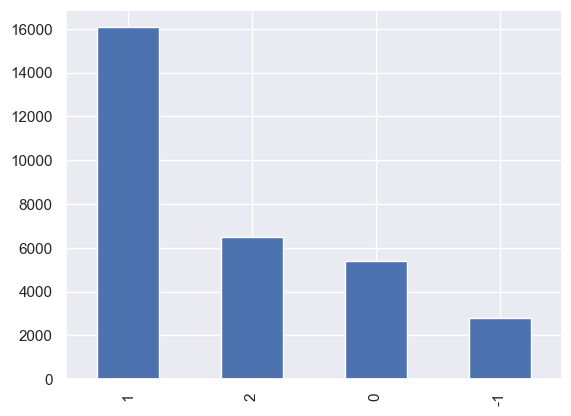

In [17]:
#distribution of the classes in the label

df_train['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

From the distribution, it can be seen that the classes in the label are imbalanced. The pro which is represented by 1 is way more than the news(2), neutral(0) and anti(-1).Therefore, to avoid the prediction from being biased, we are going to balance the classes later in the data engineering section.

In [18]:
# Separating minority and majority classes
neutral = df_train[df_train['sentiment']==0]
pro = df_train[df_train['sentiment']==1]
anti = df_train[df_train['sentiment']== -1]
news = df_train[df_train['sentiment']== 2]

In [19]:
#checking the percentage of people who believe in climate change
pro_percent = len(pro)/ (len(neutral)+len(pro)+len(anti)+len(news))
pro_percent

0.5225462466270034

In [20]:
#checking the percentage of people who do not believe in climate change
anti_percent = len(anti)/ (len(neutral)+len(pro)+len(anti)+len(news))
anti_percent

0.0908026918950551

In [21]:
#checking the percentage of people who are indifferent about climate change
neutral = len(neutral)/ (len(neutral)+len(pro)+len(anti)+len(news))
neutral

0.17555837315907538

From the above analysis, we can see that the classes in our response variable is not balanced. The pro is made up of 53.9 percent of the label column while the anti only contains 8.19 percent of the label. This can greatly lead to bias in prediction by our model because it is going to be more exposed to the pro sentiment than the other sentiments. Therefore we need to balance it during the Data Engineering part of our work.

### 4.2. VISUALS

In this subsection, we are going to visualise the most occuring words in each classes of the label. These words help our model to be well trained in order to be able to predict on the test data.

In [22]:
#visualising the frequent words in the train dataset
all_words = " ".join([sentence for sentence in preprocessed_train_data['message']])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

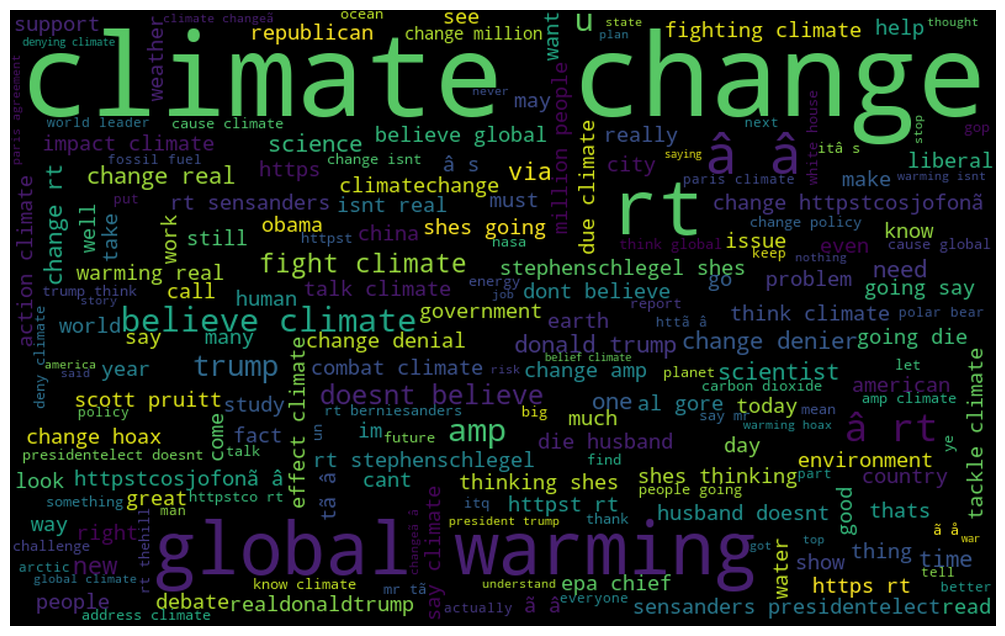

In [23]:
#Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

From the visuals above, it can be seen that the bigger the words, the more dominant they are. The following list of words/phrases are among the dominant words;

Climate Change

Global Warming 

Change 

Urlweb

Planet 

donald trump 



In [24]:
#visualising the frequent words in the train dataset
all_words = " ".join([sentence for sentence in preprocessed_train_data['message']
                      [preprocessed_train_data['sentiment']==1]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

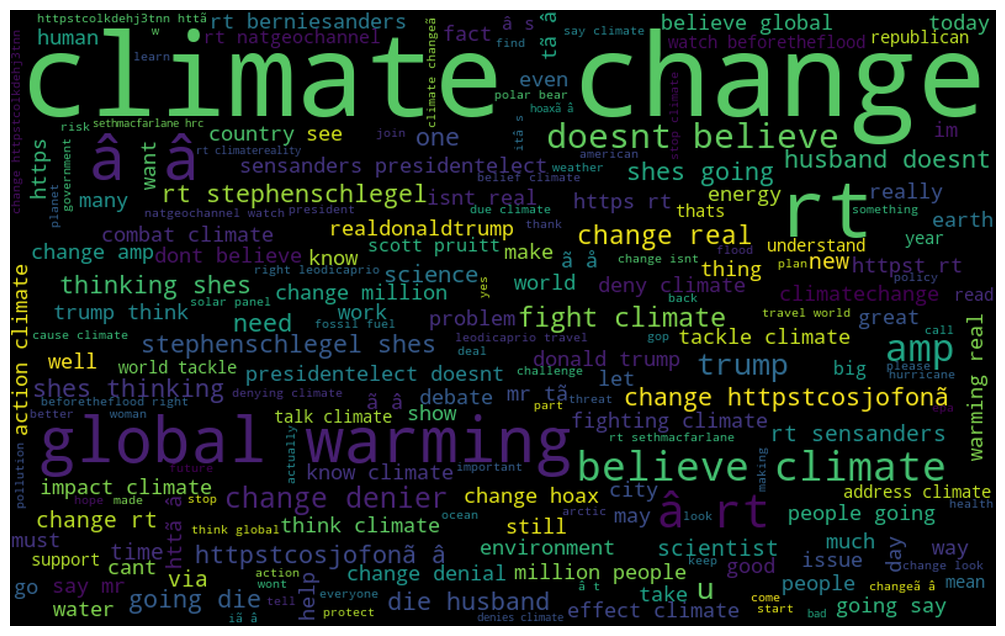

In [25]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

From the visual above, it can be seen that the following words/phrases were frequently used by people who believe climate change exists;

Climate Change

Environment

Believe

tackle climate

think climate

fight climate

global warming

In [26]:
#visualising the frequent words in the train dataset
all_words = " ".join([sentence for sentence in preprocessed_train_data['message']
                      [preprocessed_train_data['sentiment']==-1]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

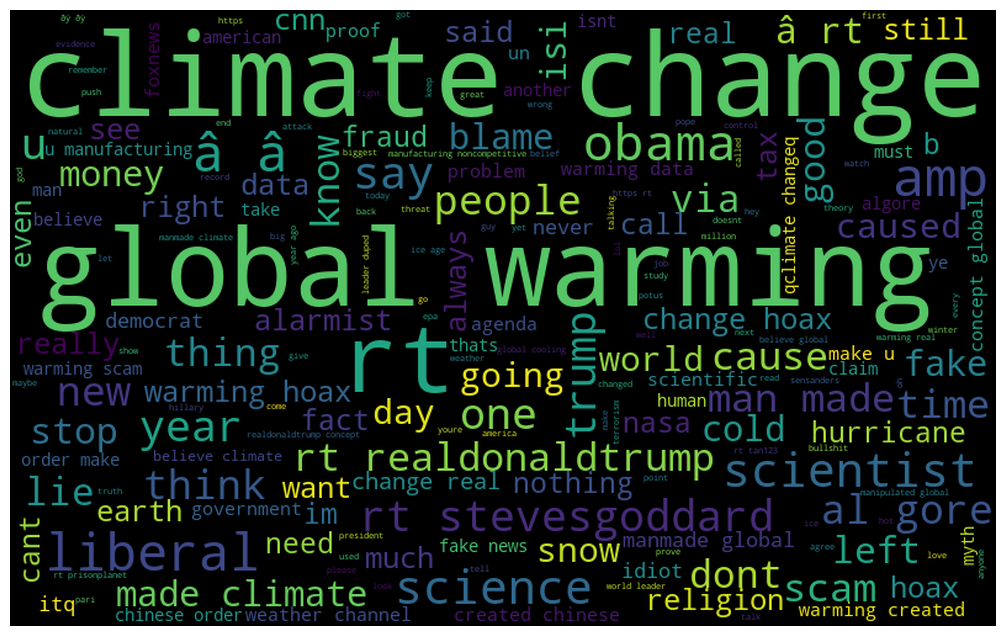

In [27]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

From the visual above, it can be seen that the following words/phrases were frequently used by people who do not believe climate change exists;

Climate Change

hoax

scam

fake

alarmist

manmade climate

agenda

In [28]:
#visualising the frequent words in the train dataset
all_words = " ".join([sentence for sentence in preprocessed_train_data['message']
                      [preprocessed_train_data['sentiment']==0]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

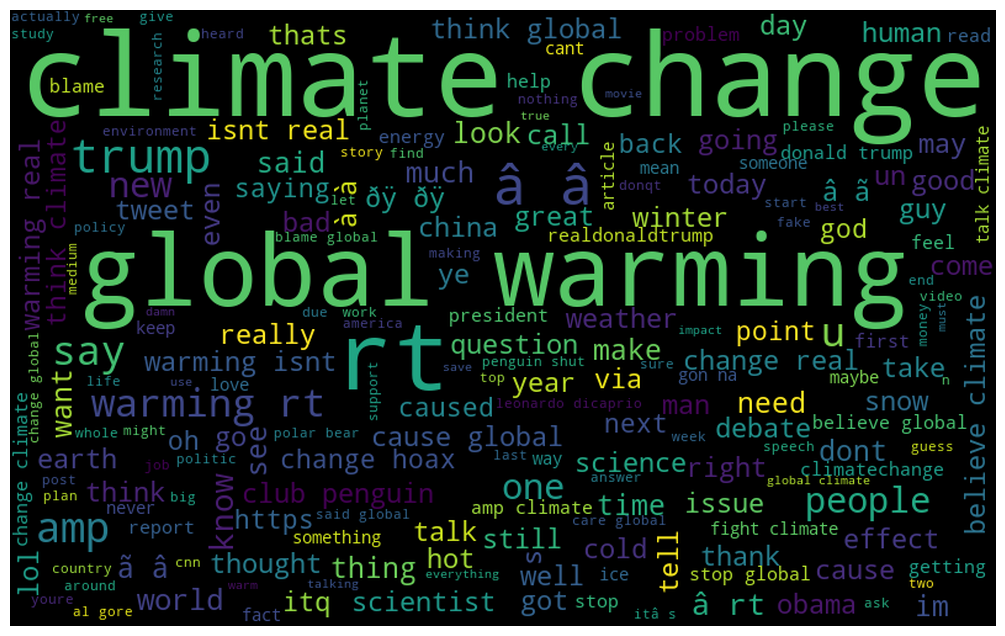

In [29]:
## Ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

For the neutrals, the frequent words/phrases used are listed below;

going

never

club penguin

really

The words in this class do not really show if people believe in climate change or not.

In [30]:
#visualising the frequent words in the train dataset
all_words = " ".join([sentence for sentence in preprocessed_train_data['message']
                      [preprocessed_train_data['sentiment']==2]])
wordcloud = WordCloud(width= 800, height = 500, random_state= 42, max_font_size= 100).generate(all_words)

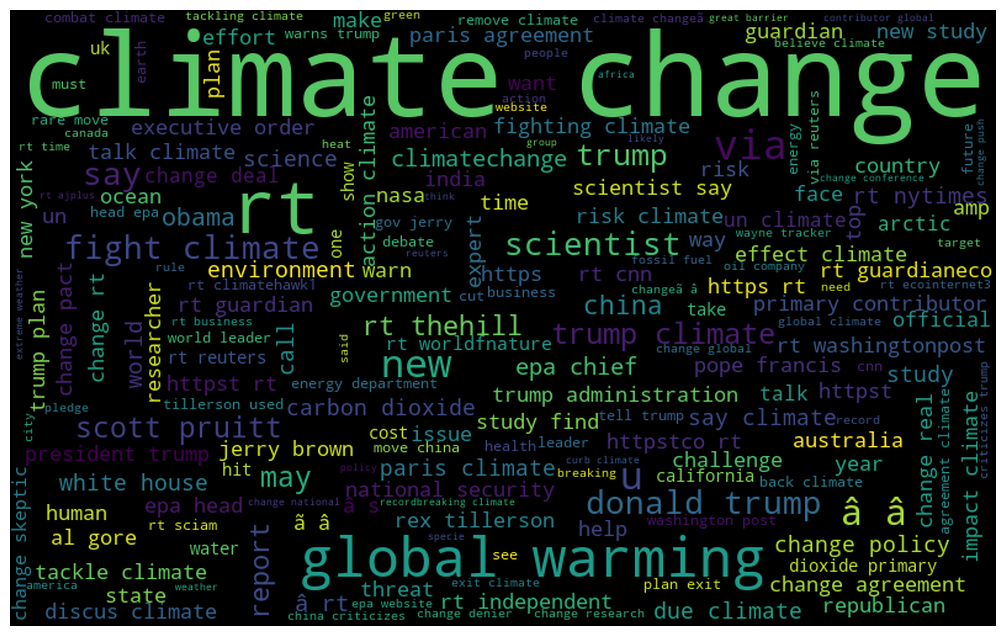

In [31]:
## ploting the graph
plt.figure(figsize = (15, 8))
plt.imshow(wordcloud, interpolation = 'blackman')
plt.axis('off')
plt.show()

From the visual above, it can be seen that this class is obviously news category. The following words/phrases show it is news;

urlweb

paris agreement

independent

energy department

research

study find

guardian

<a id="four"></a>
# 5. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section we are going to transform the dataset with the help of a vectoriser. This is the phase where we transform our text data to numeric data so that the model can understand it.|
---

Before using model on our data, we need to transform the text data which is the cleaned data to numeric data for our model to be able to use in training and prediction. To do this, we need a count vectoriser. 

In [32]:
def vectorize_text(train_data, test_data):
    """
    Vectorizes the text data using TF-IDF vectorizer. It transforms both the training and test data into
    TF-IDF feature representations.

    Args:
        train_data (list): The list of text data for training.
        test_data (list): The list of text data for testing.

    Returns:
        tuple: A tuple containing the vectorized training data and test data.

    Example:
        train_text = ['This is the first document.', 'This document is the second document.']
        test_text = ['This document is the third document.']
        train_features, test_features = vectorize_text(train_text, test_text)
    """
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()

    # Fit and transform the training data
    train_features = vectorizer.fit_transform(train_data)

    # Transform the test data
    test_features = vectorizer.transform(test_data)

    #pickling the vectoriser and storing for later use during development of our app
    model_save_path = "C:/Users/emmau/Downloads/sentiment-climate/climate-sentiment-analysis/data/02_intermediate/tfVector.pkl"
    with open(model_save_path,'wb') as file:
        pickle.dump(vectorizer,file)
  

    return train_features, test_features

In [33]:
train_features, test_features = vectorize_text(preprocessed_train_data['message'], 
                                               preprocessed_test_data['message'])

# Print the vectorized features
print(train_features.toarray())
print(test_features.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
#assigning a variable to our label
y = preprocessed_train_data['sentiment']

In [35]:
#using SMOTE for upsampling our classes
smt = SMOTE(random_state = 1, k_neighbors = 1)

#fitting X and y variable to the SMOTE
X,y = smt.fit_resample(train_features, y)

From the exploratory data analysis phase, we saw that the classes in our label are imbalanced, therefore we are going to balance the data with the use of SMOTE which will automatically help us upsample the classes that are lower to meet the biggest class which is the pro(1) class.

SMOTE was successfully fitted to the X and y variables.

In [36]:
#count of the classes in the label
y.value_counts()

 0    16073
 1    16073
 2    16073
-1    16073
Name: sentiment, dtype: int64

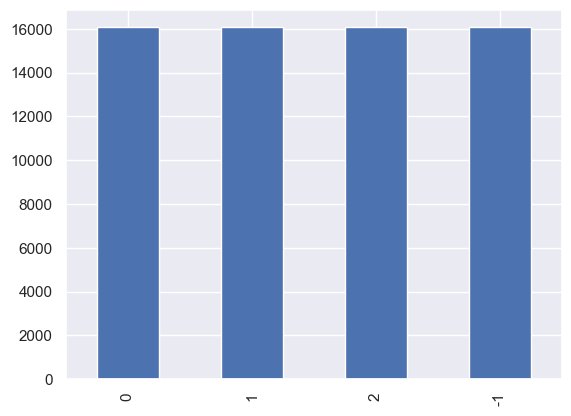

In [37]:
y.value_counts().plot(kind = 'bar')
plt.show()

From the bar chart above, we can see our 4 classes have been balanced. We can now proceed to the modelling phase of this work.

<a id="five"></a>
# 6. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a> 

---

    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section, we created classification models that are able to accurately predict the sentiments |

---

In [38]:
#train-test split
x_train, x_test, y_train, y_test = train_test_split(X, y, 
random_state = 42, test_size = 0.20)

### MODEL TRAINING

In [39]:
def train_model(model, X_train, y_train):
    """
    Trains a machine learning model on input training data.
    
    Parameters:
        model (object): A machine learning model object with a `fit` method.
        X_train (array-like): Input training data for the model.
        y_train (array-like): Output training data for the model.
        
    Returns:
        object: A trained machine learning model object.
    """
    # Fit the model on the input training data
    model.fit(X_train, y_train)
    
    # Return the trained model
    return model

In [40]:
#initializing the algorithms to be used
Log_reg = LogisticRegression()
svc = SVC(kernel='rbf')
tree = DecisionTreeClassifier()

In [41]:
#training logistic regression model
Logr = train_model(Log_reg, x_train, y_train)
Logr

LogisticRegression()

In [42]:
#training linear support vector machine model
svc_model = train_model(svc, x_train, y_train)
svc_model

SVC()

In [43]:
#training decision tree model
tree_model = train_model(tree, x_train, y_train)
tree_model

DecisionTreeClassifier()

### MODEL PREDICTION

In [44]:
def predict(model, X_test, data, target, result_title, new_data=None):
    """
    Uses a trained machine learning model to make predictions on new data.
    
    Parameters:
        model (object): A trained machine learning model object with a `predict` method.
        X_test (array-like): Input data to make predictions on.
        
    Returns:
        array-like: An array of predicted values for each input in `X_test`.
    """
    # Use the model to make predictions on the input data
    y_pred = model.predict(X_test)

     # If new unseen data is provided, make predictions on it as well
    if new_data is not None:
        model.fit(data, target)
        y_pred_unseen = model.predict(new_data)
        #result of the prediction
        result_model = pd.DataFrame(y_pred_unseen, columns= ['subscribed'])
        # merge the one-hot encoded data frame with the original data frame
        test_result = pd.concat([df_test, result_model], axis=1)
        final_result = test_result[['customer_id', 'subscribed']]
        final_result.to_csv(result_title, index = False)    #this helps to output and store the final prediction to csv
        print(final_result)
        return y_pred
    
    # Return the predictions
    return y_pred, final_result

In [45]:
#logistic regression prediction
logr_predict = predict(Log_reg, x_test, X, y, 
                       "logr_pred.csv", new_data=test_features)

KeyError: "['customer_id'] not in index"

In [ ]:
#svc model prediction
svc_predict = predict(svc, x_test, X, y, 
                       "svc_pred.csv", new_data=test_features)

In [ ]:
#tree model prediction
tree_predict = predict(tree, x_test, X, y, 
                       "tree_pred.csv", new_data=test_features)

### MODEL EVALUATION

In [ ]:
def evaluate(model, X_test, y_test):
    """
    Evaluates the performance of a machine learning model on input test data.
    
    Parameters:
        model (object): A trained machine learning model object with a `predict` method.
        X_test (array-like): Input data to make predictions on.
        y_test (array-like): True output values for the input test data.
        
    Returns:
        float: The evaluation score for the model's predictions.
    """
    # Use the model to make predictions on the input test data
    y_pred = model.predict(X_test)
    
    # Evaluate the predictions using an appropriate metric (e.g., accuracy, MSE, etc.)
    report = classification_report(y_test, y_pred)
    
    # Return the evaluation score
    return report

In [ ]:
#logistic regression evaluation
logr_report = evaluate(Log_reg, x_test, y_test)
print(logr_report)

In [ ]:
#svc evaluation
svc_report = evaluate(svc, x_test, y_test)
print(svc_report)

In [ ]:
#decision tree evaluation
tree_report = evaluate(tree, x_test, y_test)
print(tree_report)